### **Part B – Implementation (R or Python) 4pts**
**Data.** I have included the wine-quality dataset (WineQT.csv). Read it into your programming language of choice. Your y column is quality, the rest constitute your parameters X. Always add the intercept column of ones.

&nbsp;&nbsp;&nbsp;&nbsp;**Steps.**

&nbsp;&nbsp;&nbsp;&nbsp;**B.1** Prepare X (add intercept); optionally standardize features.

In [1]:
# reading in the data

import pandas as pd

wine = pd.read_csv("WineQT.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [2]:
import numpy as np

# setting X as all columns except "quality"
X = wine.drop("quality", axis = 1).values

# first standardizing the data because the below loop was returning NaN
# and errors due to beta explosion and too large of learning rates
# without doing so. this just scales all of the features to have a mean
# of 0 and a standard deviation of 1.
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

# adding the intercept column
X = np.hstack([np.ones((X.shape[0], 1)), X])

# setting y as the "quality" column
y = wine["quality"].values.reshape(-1, 1)

&nbsp;&nbsp;&nbsp;&nbsp;**B.2** Initialize β (zeros or small random).

In [3]:
# initializing β with zeros
B = np.zeros((X.shape[1], 1))

&nbsp;&nbsp;&nbsp;&nbsp;**B.3** For T=2000 iterations: yˆ=Xβ; e=yˆ−y; g=1/n X⊤e; β←β−αg; record Lt = 1/2n∥e∥2.

In [4]:
# setting T to 2000 iterations and defining a few alphas to try
T = 2000
a_to_try = [0.001, 0.01, 0.1, 0.5]

# initializing results to store loop output
results = {}

# loop to try 2000 iterations for each alpha, saving L_T for each
for a in a_to_try:
    B = np.zeros((X.shape[1], 1))

    loss = []

    for t in range(T):
        y_hat = X @ B
        error = y_hat - y
        gradient = (1/X.shape[0]) * (X.T @ error)
        B = B - a * gradient

        L_t = (1/(2*X.shape[0])) * np.sum(error**2)
        loss.append(L_t)

    results[a] = {
    "Beta": B.copy(),
    "Losses": loss
    }

    print(f"α = {a}, Final loss: {loss[-1]}")

α = 0.001, Final loss: 0.49796173099132474
α = 0.01, Final loss: 0.20283392588070195
α = 0.1, Final loss: 0.20281523814938776
α = 0.5, Final loss: 0.20281523814937358


&nbsp;&nbsp;&nbsp;&nbsp;**B.4** Plot Lt vs. iteration for several α; discuss convergence.

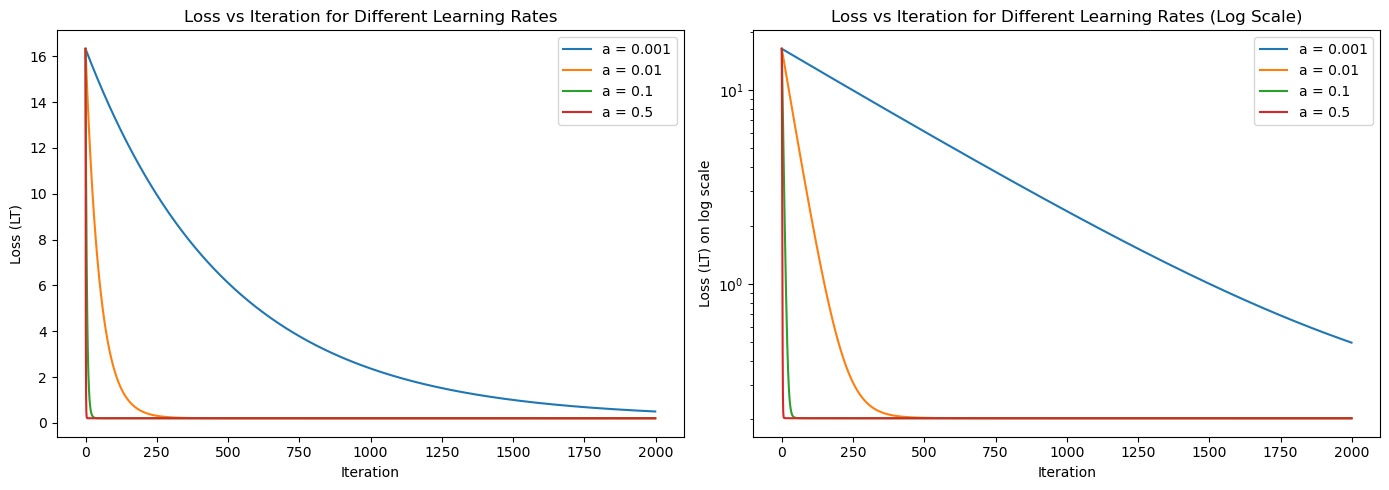

In [5]:
# plotting L_t vs iteration using matplotlib, for the above tested alphas

import matplotlib.pyplot as plt

plt.figure(figsize = (14, 5))

plt.subplot(1, 2, 1)
for a in a_to_try:
    plt.plot(results[a]["Losses"], label = f"a = {a}")
plt.xlabel("Iteration")
plt.ylabel("Loss (LT)")
plt.title("Loss vs Iteration for Different Learning Rates")
plt.legend()

# also including a log-scaled plot, which might help with interpretation
plt.subplot(1, 2, 2)
for a in a_to_try:
    plt.semilogy(results[a]["Losses"], label = f"a = {a}")
plt.xlabel("Iteration")
plt.ylabel("Loss (LT) on log scale")
plt.title("Loss vs Iteration for Different Learning Rates (Log Scale)")
plt.legend()

plt.tight_layout()
plt.show()

Convergence means that the model has found its minimum loss, the β values are at their optimal solutions, and the model cannot be improved by further iterations. From the Loss vs Iteration plots for the different alphas (learning rates), it looks as though a = 0.5 begins converged from the first iteration. a = 0.1 is very similar in pattern to the previous, and seems to converge very soon after first few iterations. a = 0.01 has a fast and stable convergence and seems to flatten out around 500 iterations. a = 0.001 has a very slow/stable convergence and seems to be continuing to converge even at the 2000th iteration, meaning that the loss is still decreasing and more iterations are needed to reach the minimum. Out of the learning rates I chose to test and based on these plots, I would say that a = 0.01 is an optimal learning rate because it achieves fast convergence without being too aggressive, while maintaining stability. The β values stop changing significantly between iterations and the minimum has been reasonably reached (~500 iterations).

&nbsp;&nbsp;&nbsp;&nbsp;**B.5** Compare βgrad to βnormal = (X⊤X)−1*X⊤y after your descent loop has run. Print ∥βgrad − βnormal∥2.

&nbsp;&nbsp;&nbsp;&nbsp;βgrad = β←β−α*1/n *X⊤(Xβ−y)

&nbsp;&nbsp;&nbsp;&nbsp;βnormal = (X⊤X)−1*X⊤y

&nbsp;&nbsp;&nbsp;&nbsp;This is comparing the analytical least squares solutions of the gradient to the gradients derived by gradient descent.

In [6]:
# comparing the ||B_grad - B_norm||2's for each learning rate tested
for a in a_to_try:
    B_grad = results[a]["Beta"]

    XTX = X.T @ X
    XTy = X.T @ y
    B_norm = np.linalg.solve(XTX, XTy)

    diff = np.linalg.norm(B_grad - B_norm, ord = 2)
    print(f"α = {a}: ||B_grad - B_norm||2 = {diff}")

α = 0.001: ||B_grad - B_norm||2 = 0.7757444146445235
α = 0.01: ||B_grad - B_norm||2 = 0.025018407826275308
α = 0.1: ||B_grad - B_norm||2 = 6.94702228768926e-07
α = 0.5: ||B_grad - B_norm||2 = 6.614005382534949e-15


From the output differences between the analytical least squares solution of the gradient and the gradient derived by gradient descent for each learning rate, it seems that a = 0.01 has the smallest difference (0.025). This means that the β values here are very close to the "correct" value and the gradient descent found the minimum with good convergence. On the other hand, a = 0.5, which appeared immediately converged, had a difference of 6.61. Although the loss curve looks converged, this means that the parameters are incorrect and oscillations may be occurring due to how large the learning rate is.